In [82]:
%pip install statsmodels
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, MeanShift, MiniBatchKMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS

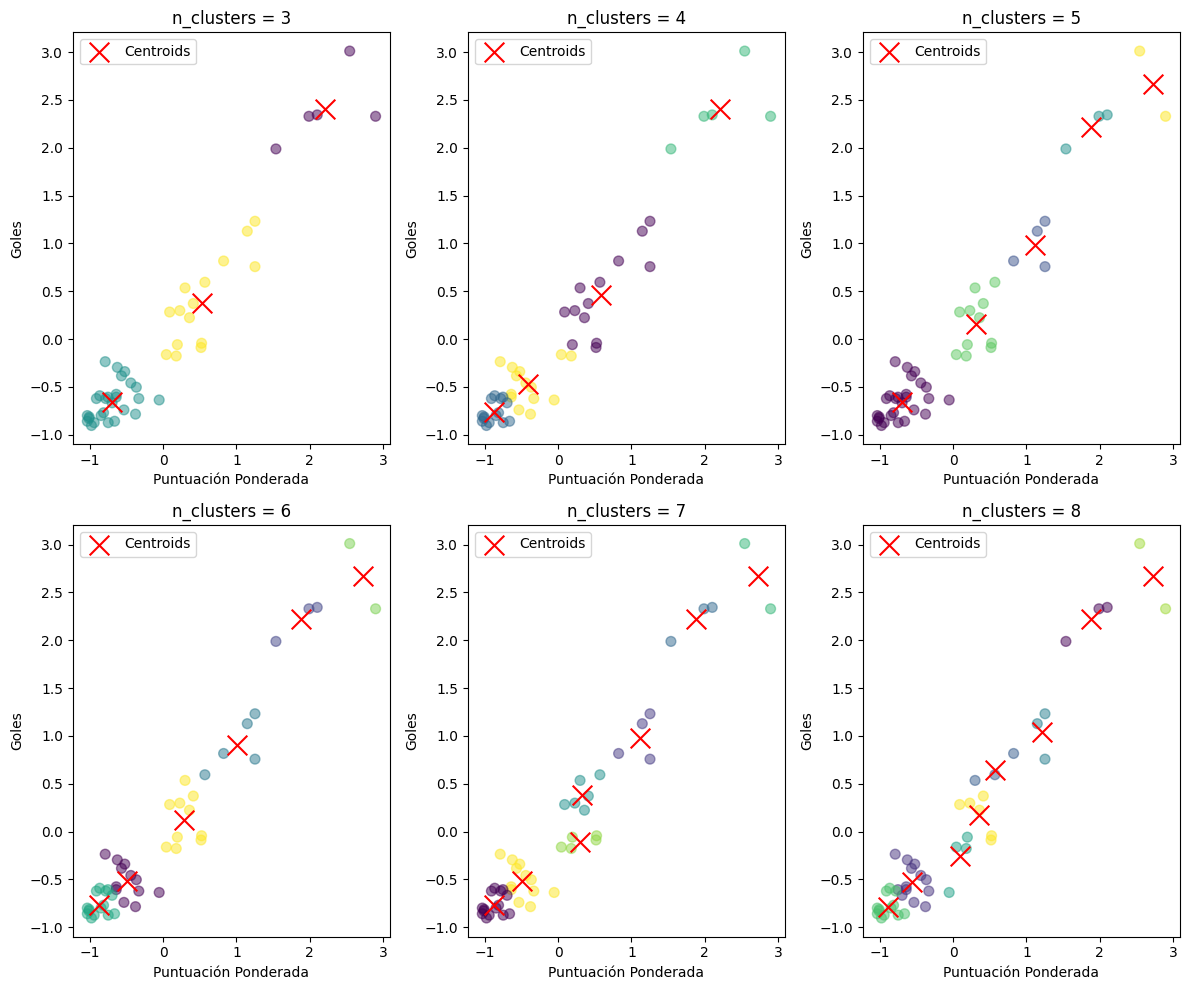

In [84]:
# Cargar los datos
data = pd.read_csv('Datos_Limpios/Puntaje_completo_equipos.csv')

# Seleccionar las características para la clasificación
X = data[['Puntuacion Ponderada', 'Goles']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir el rango de número de clústeres
num_clusters = [3, 4, 5, 6, 7, 8]

# Crear subplots para cada número de clústeres
fig, axs = plt.subplots(2, 3, figsize=(12, 10))

for i, ax in enumerate(axs.flat):
    # Entrenar el modelo de K-Means
    kmeans = KMeans(n_clusters=num_clusters[i])
    kmeans.fit(X_scaled)

    # Obtener las etiquetas de los clústeres y los centroides
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Scatter plot de los puntos de datos
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)

    # Scatter plot de los centroides
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

    ax.set_title(f'n_clusters = {num_clusters[i]}')
    ax.set_xlabel('Puntuación Ponderada')
    ax.set_ylabel('Goles')
    ax.legend()

plt.tight_layout()
plt.show()


Viendo los datos voy a elegir 6 clusters ya que es el número de clusters que más se asemeja a la muestra

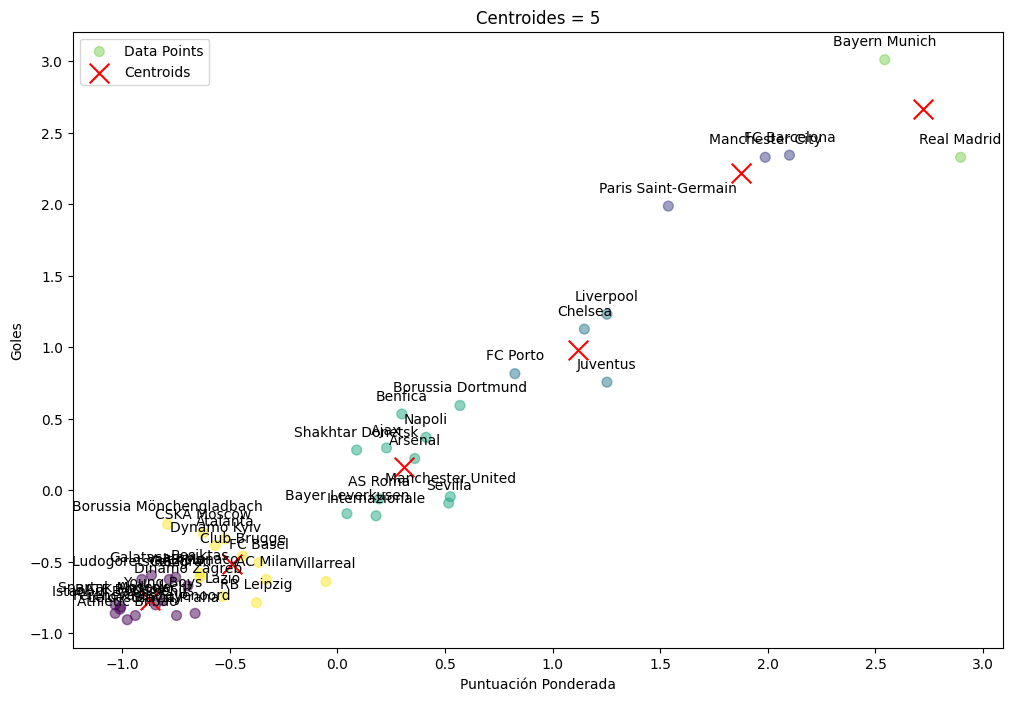

In [85]:
# Cargar los datos
data = pd.read_csv('Datos_Limpios/Puntaje_completo_equipos.csv')

# Seleccionar las características para la clasificación
X = data[['Puntuacion Ponderada', 'Goles']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear una nueva figura y eje para el gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Entrenar el modelo de K-Means
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_scaled)

# Obtener las etiquetas de los clústeres y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Scatter plot de los puntos de datos
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5, label='Data Points')

# Scatter plot de los centroides
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

# Añadir el nombre de los equipos a cada punto
for i, txt in enumerate(data['Equipo']):
    ax.annotate(txt, (X_scaled[i, 0], X_scaled[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

# Añadir el título y etiquetas de los ejes
ax.set_title(f'Centroides = {5}')
ax.set_xlabel('Puntuación Ponderada')
ax.set_ylabel('Goles')

# Añadir la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

En el primer Cluster encontramos al Real Madrid y al Bayern de Munich, que son los principales favoritos a ganar la champions, al igual que los del segundo cluster como al Manchester City, Paris Saint Germain y el FC Barcelona y para terminar el resto de equipos repartidos en los demás clústeres

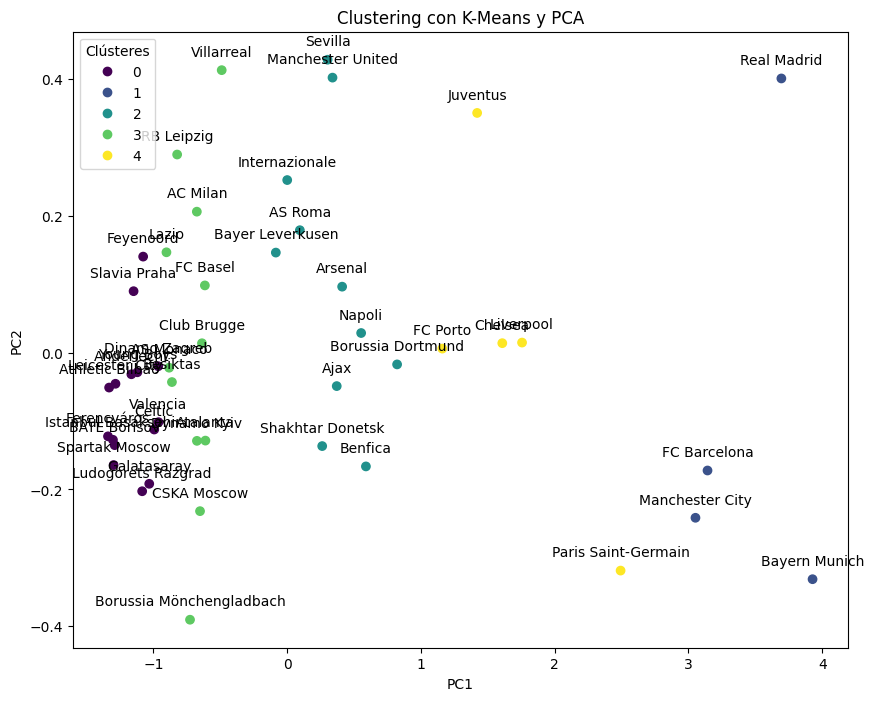

In [86]:
# Cargar los datos
data = pd.read_csv('Datos_Limpios/Puntaje_completo_equipos.csv')

# Seleccionar características para clustering
X = data[['Puntuacion Ponderada', 'Goles']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering con algoritmos de centroides (K-Means)
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización de los resultados con nombres de equipos
plt.figure(figsize=(10, 8))

# Scatter plot de los puntos de datos
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')

# Añadir etiquetas para cada punto (nombre del equipo)
for i, txt in enumerate(data['Equipo']):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

# Añadir leyenda
plt.legend(*scatter.legend_elements(), title="Clústeres")

plt.title('Clustering con K-Means y PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Aquí observamos la misma tendencia de equipos asociados a los mismos clústeres

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Cargar los datos
data = pd.read_csv('Datos_Limpios/Puntaje_completo_equipos.csv')

# Seleccionar las características y la variable objetivo
X = data[['Goles', 'Puntos', 'Puntuacion UEFA']]
y = data['Puntuacion Ponderada']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Realizar predicciones
predictions_rf = model_rf.predict(X_test)

# Calcular Error Absoluto Medio (MAE)
mae_rf = mean_absolute_error(y_test, predictions_rf)

# Calcular Raíz del Error Cuadrático Medio (RMSE)
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions_rf))

# Calcular Coeficiente de Determinación (R-cuadrado)
r2_rf = r2_score(y_test, predictions_rf)

# Calcular Error Porcentual Absoluto Medio (MAPE)
mape_rf = np.mean(np.abs((y_test - predictions_rf) / y_test)) * 100

print('MAE Random Forest:', mae_rf)
print('RMSE Random Forest:', rmse_rf)
print('R^2 Random Forest:', r2_rf)
print('MAPE Random Forest:', mape_rf)
mse_rf = mean_squared_error(y_test, predictions_rf)
print('MSE Random Forest:', mse_rf)


MAE Random Forest: 14.119000000000005
RMSE Random Forest: 17.41103414504722
R^2 Random Forest: 0.9674546456403381
MAPE Random Forest: 11.166950678651629
MSE Random Forest: 303.14411000000024


Una vez tenemos las métricas voy a plotear el Random Forest

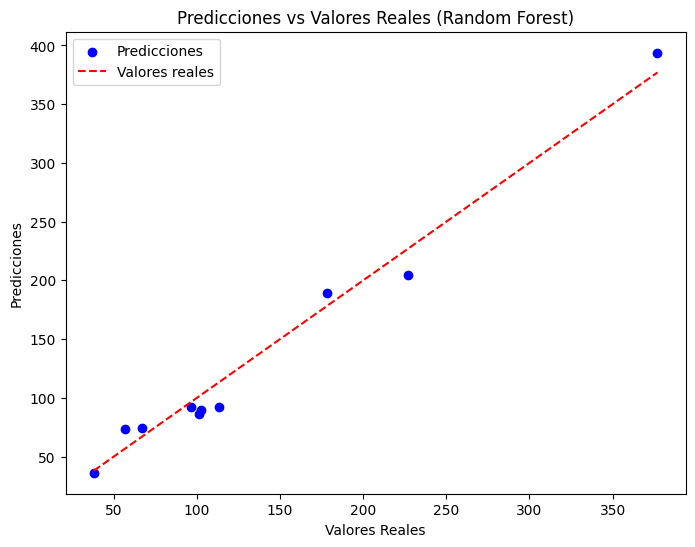

Métricas de evaluación:
MAE Random Forest: 12.935500000000001
RMSE Random Forest: 14.517976184716659
R^2 Random Forest: 0.9773716947075867
MAPE Random Forest: 11.553559354586811


In [91]:
# Cargar los datos
data = pd.read_csv('Datos_Limpios/Puntaje_completo_equipos.csv')

# Seleccionar las características y la variable objetivo
X = data[['Goles', 'Puntuacion UEFA']]
y = data['Puntuacion Ponderada']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Realizar predicciones
predictions_rf = model_rf.predict(X_test)

# Calcular métricas de evaluación
mae_rf = mean_absolute_error(y_test, predictions_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions_rf))
r2_rf = r2_score(y_test, predictions_rf)
mape_rf = np.mean(np.abs((y_test - predictions_rf) / y_test)) * 100

# Plotear valores reales vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_rf, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Valores reales')
plt.title('Predicciones vs Valores Reales (Random Forest)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()

print('Métricas de evaluación:')
print('MAE Random Forest:', mae_rf)
print('RMSE Random Forest:', rmse_rf)
print('R^2 Random Forest:', r2_rf)
print('MAPE Random Forest:', mape_rf)

Como podemos observar es bastante preciso, vamos a hacer la matriz de correlanción para terminar

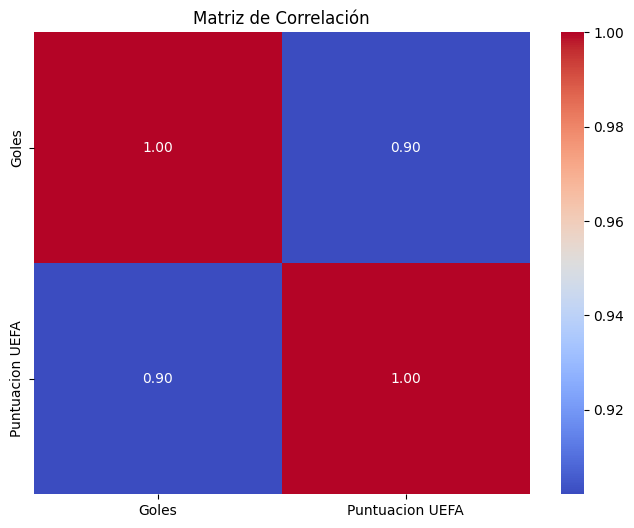

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matriz de correlación
correlation_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Como podemos observar hay una gran correlación entre los goles y los puntos que da la UEFA